# Capstone Project 1: Data Story

This notebook contains the story of the exploratory analysis done on the seeds data set. 

## Questions Asked

What are the summary statistics of each feature for each class?

Is there any clustering present when comparing two different features?

Are there any outliers?

How do we increase the size of the dataset?

Can synthetic data be created from the feature distributions?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats 
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Let's start with loading the clean data we produced from data wrangling:
seeds = pd.read_csv('seeds.csv')
seeds

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [6]:
#We can now get the summary statistics using info and describe:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   class                  210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


In [7]:
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


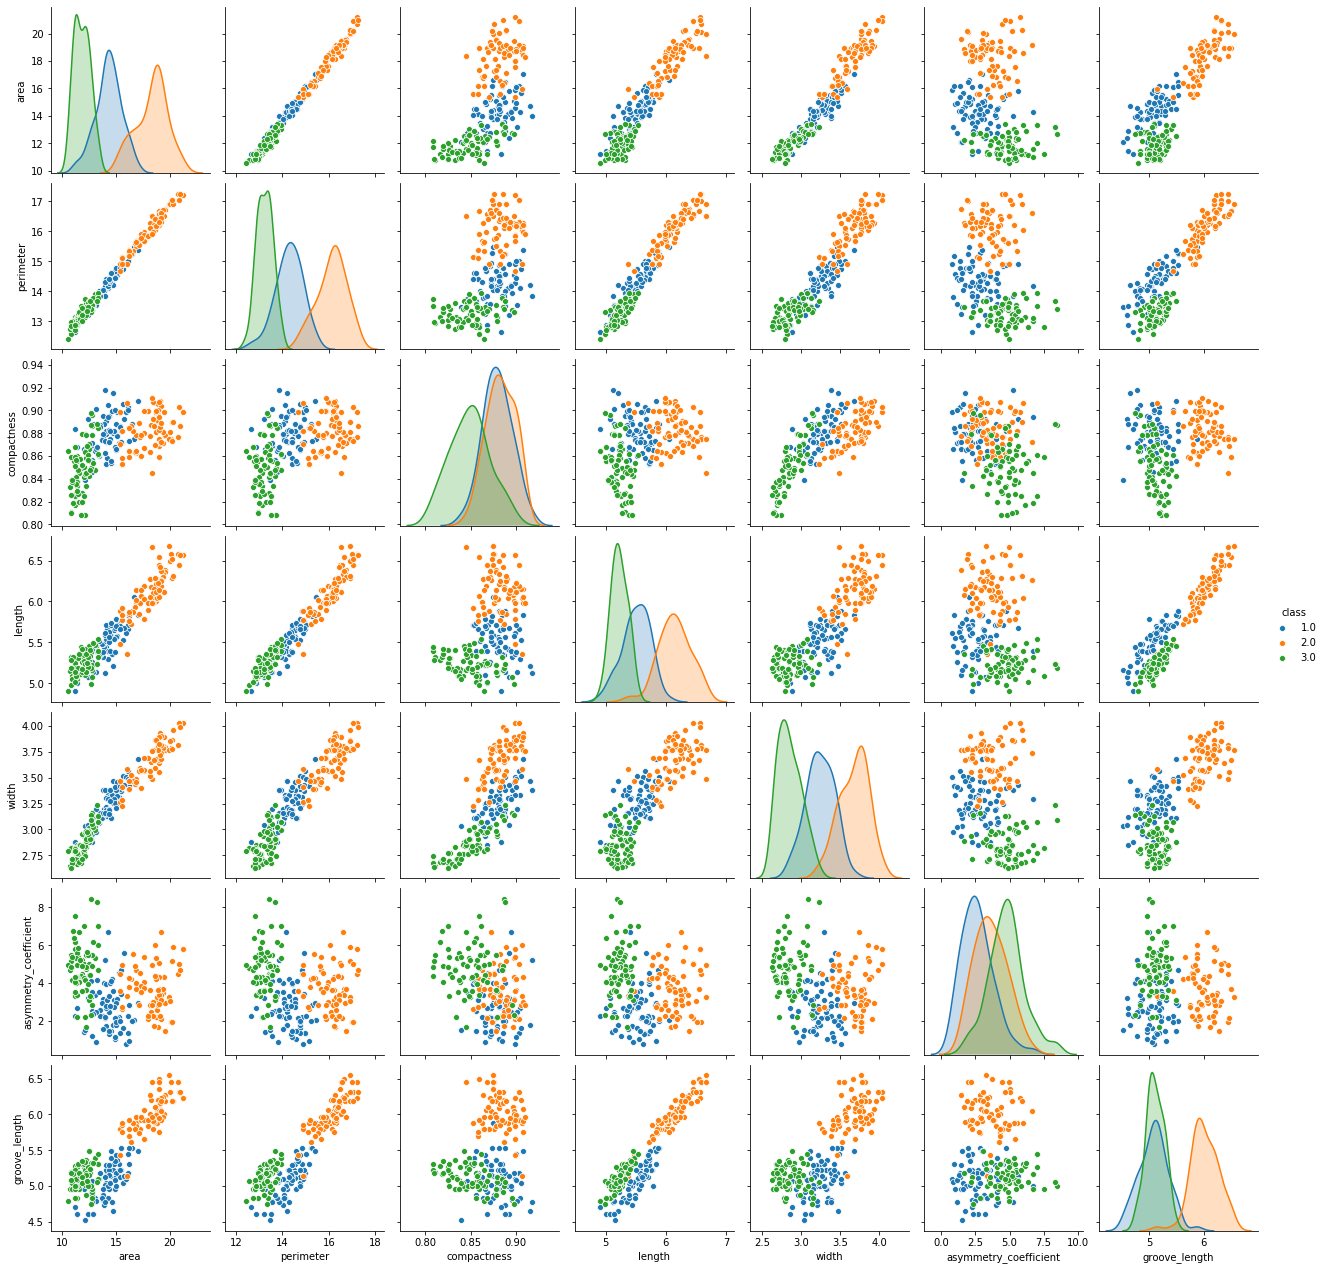

In [5]:
#seaborn has a wonderful function that produces a matrix of scatterplots. We can use it to see what possible
#variable combinations might be of interest for further exploration. This plot can take some time to complete:
_=sns.pairplot(seeds, hue='class')

Examining the scatter plots above, there appears to be recognizable clustering. The clustering is more prominent in certain feature comparisons, such as length and groove length. The distributions on the diagonal show some skew, but are mostly smooth and not quite normally distributed. The groove length distribution shows separation for one class, and complete overlap of the other two. This separation leads to identifiable clusters in plots where groove length is involved. The area distributions show decent separation, and when combined with groove length could lead to even better clustering. In all cases there is some overlap of the distributions, meaning that it will always be possible to misclassify a certain seed because it will have properties that fall under the distribution of the incorrect classification.

## Trends

Many of the scatter plots above show excellent linear relationships. The length v groove length plot shows good cluster separation, as well as a linear trend in each class. The derived features, i.e. asymmetry coefficient and compactness, show no clear trend. They tend to appear more nebulous in relation to the other variables, which may not be of surprise because they are derived from them. Let's explore the feature statistics more closely.

area


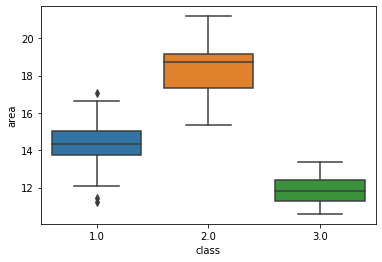

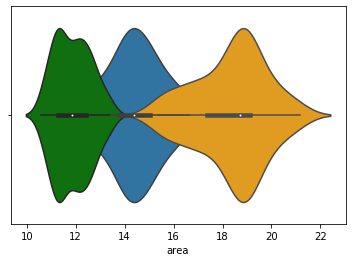

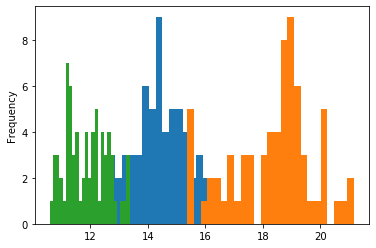

perimeter


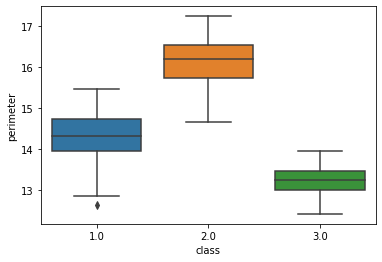

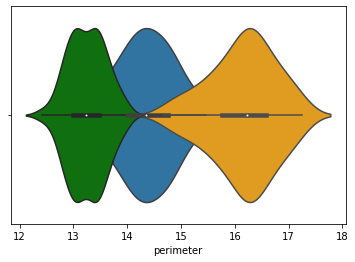

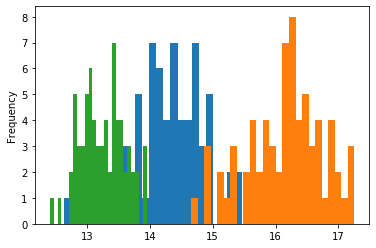

compactness


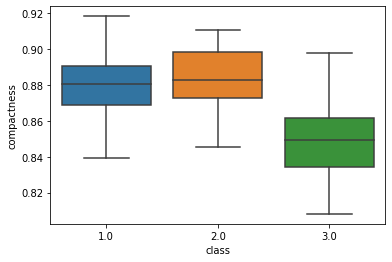

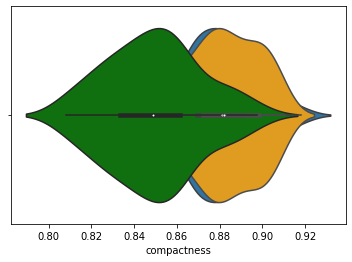

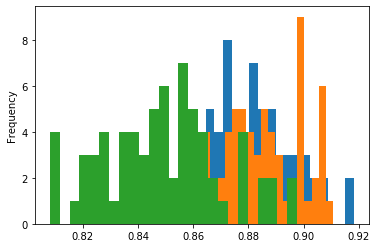

length


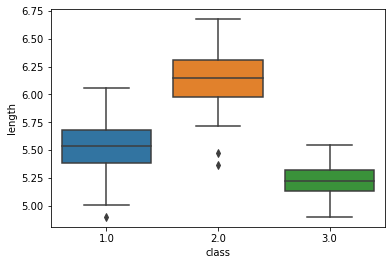

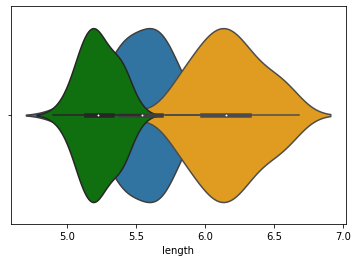

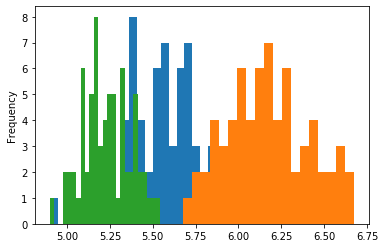

width


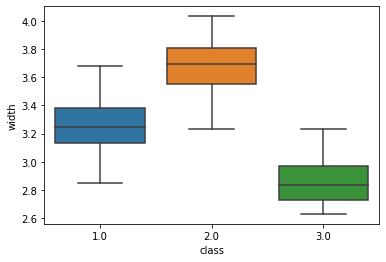

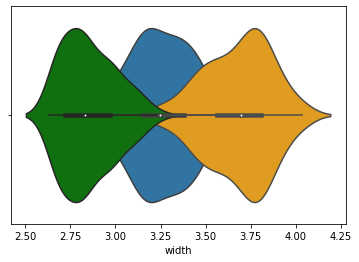

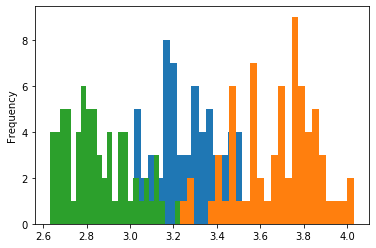

asymmetry_coefficient


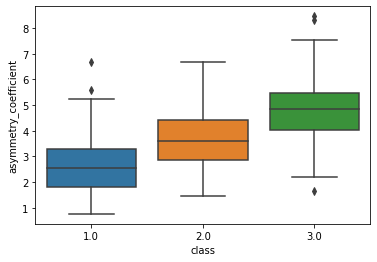

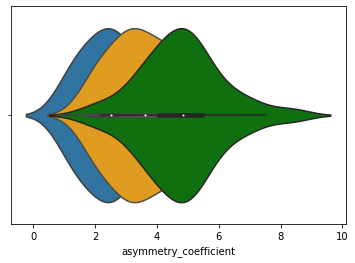

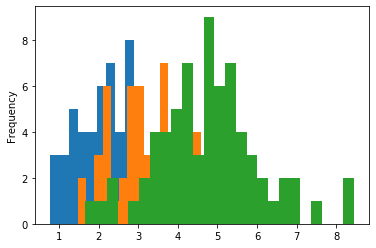

groove_length


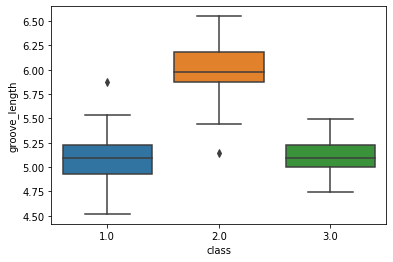

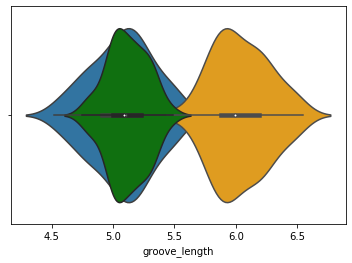

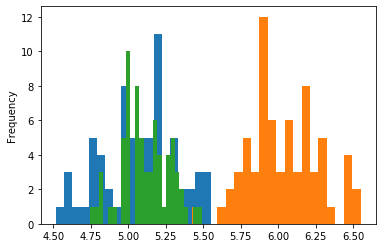

In [5]:
#We can make boxplots comparing the class features to better see how they relate:
for column in seeds.columns:
    print('===='*15)
    if column=='class':
        break
    print(column)
    _=plt.figure()
    _=sns.boxplot(x='class',y=str(column),data=seeds)
    plt.show()
    _=plt.figure()
    _=sns.violinplot(x=seeds[str(column)].iloc[0:69])
    _=sns.violinplot(x=seeds[str(column)].iloc[70:139],color='orange')
    _=sns.violinplot(x=seeds[str(column)].iloc[140:209],color='green')
    plt.show
    _=plt.figure()
    _=seeds[str(column)].iloc[0:69].plot(kind='hist',bins=25)
    _=seeds[str(column)].iloc[70:139].plot(kind='hist',bins=25)
    _=seeds[str(column)].iloc[140:209].plot(kind='hist',bins=25)
    plt.show()

The above plots give us a good understanding of how the class features are individually distributed, as well as how they relate to one another. There are a few outliers that can be seen in each class, but class 1 (Kama) seems to have the most. Several of the outliers are found in the derived features, as well, and pose the question if they should be considered in the physical picture of the seeds. 

## Visualizations

After initial inspection it seems clear that the best clustering occurs for comparisons of length and groove length. We can make a larger histogram to get a clearer idea.

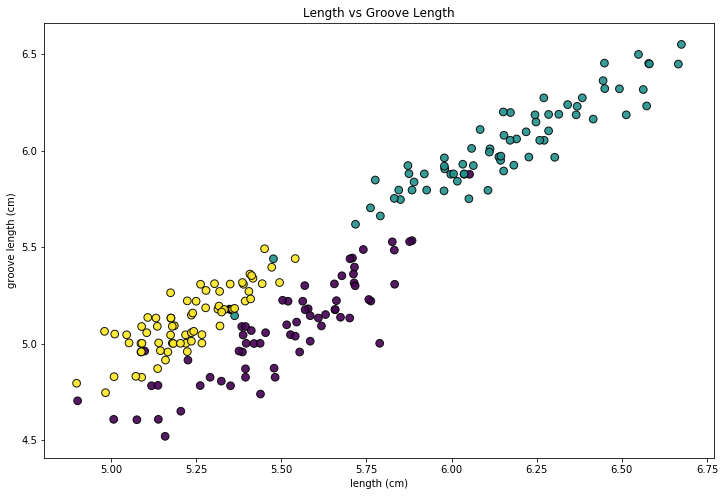

In [6]:
_=plt.figure(figsize=(12,8))
_=plt.scatter(seeds.length,seeds.groove_length,c=seeds['class'],edgecolors='black',alpha=.9,s=seeds.area.mean()*4)
_=plt.xlabel('length (cm)')
_=plt.ylabel('groove length (cm)')
_=plt.title('Length vs Groove Length')


Now we can clearly see the class clusters. The kama seed seems to be the most separated. Also apparent is the linear relationship between these two variables in each class. There are a few overlaps, which will make classification more difficult for these extreme cases. A new question arises from them: are there any misclassifications? That question is impossible to answer without input from the dataset's creators. Thusly, we will proceed with the assumption that there are no misclassificiations.

Exploring a k-nearest neighbor approach yield's decent results, but is not the approach being used in this project. Accuracies of classification probabilities achieved were around 95% on average, which is not bad. Hopefully the nearual network approach will allow even better performance when other variables are considered.

## Bootstrapping

### Increasing the size of the dataset

#### Random Sampling

Now that we have a nice dataframe, it is time to deal with the size of the data. One method for this is bootstrapping. We can take random samples from the existing dataset (with replacement), and create larger datasets with multiple copies of the existing data. These random sets will have slightly different summary statistics, such as mean and standard deviation, but the overall distribution of the mean of means will approach a normal distribution as we increase the number of sample sets. We can compute confidence intervals to better estimate the summary statistics of the overall populations of seeds on the planet. 

In [8]:
#We should create a function that samples data randomly. However, we want to split this data into training and test sets
#now, before sampling. This will lead to a smaller sample population from which to draw, but will ensure that there is unseen
#data on which to test the trained algorithm. Python's train_test_split() function will do this for us:
X = seeds.drop('class',axis=1)
y = seeds['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=np.random.randint(1,1000))
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 4 to 28
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   168 non-null    float64
 1   perimeter              168 non-null    float64
 2   compactness            168 non-null    float64
 3   length                 168 non-null    float64
 4   width                  168 non-null    float64
 5   asymmetry_coefficient  168 non-null    float64
 6   groove_length          168 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


In [9]:
#Now we create a training set dataframe with 80% of the entries evenly sampled from each class.
seeds_train = X_train
seeds_train.loc[:,'class'] = y_train
seeds_train.sort_index(inplace=True)
seeds_train

C:\Users\Erik\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Erik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1046: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Erik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1.0
...,...,...,...,...,...,...,...,...
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3.0
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [10]:
#We sample the training data with replacement 10000 times, creating a much larger sample size (but with many duplicates):
sampleDF = seeds_train.sample(10000, replace = True)
sampleDF.sort_values('class',inplace=True)
sampleDF.reset_index(inplace=True, drop=True)
sampleDF

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,16.20,15.27,0.8734,5.826,3.464,2.823,5.527,1.0
1,13.78,14.06,0.8759,5.479,3.156,3.136,4.872,1.0
2,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
3,16.19,15.16,0.8849,5.833,3.421,0.903,5.307,1.0
4,13.50,13.85,0.8852,5.351,3.158,2.249,5.176,1.0
...,...,...,...,...,...,...,...,...
9995,13.32,13.94,0.8613,5.541,3.073,7.035,5.440,3.0
9996,11.56,13.31,0.8198,5.363,2.683,4.062,5.182,3.0
9997,12.21,13.47,0.8453,5.357,2.893,1.661,5.178,3.0
9998,11.34,12.87,0.8596,5.053,2.849,3.347,5.003,3.0


In [11]:
#A result of the random sampling is that the classes no longer have equal sample sizes:
for i in [1,2,3]:
    print(len(sampleDF[sampleDF['class']==i]),'class',i)

3438 class 1
3396 class 2
3166 class 3


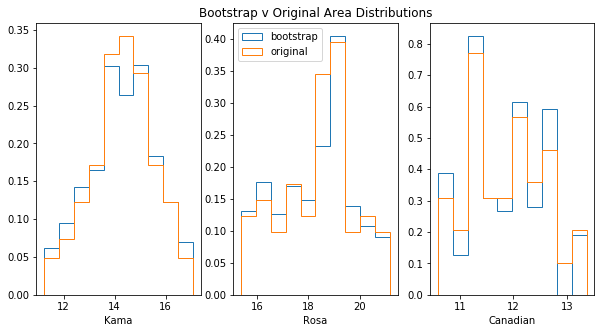

In [12]:
#However, the new sample is very close to the same distribution as the old:
new1=sampleDF[sampleDF['class']==1]
new2=sampleDF[sampleDF['class']==2]
new3=sampleDF[sampleDF['class']==3]
_=plt.figure(figsize=(10,5))
_=plt.subplot(1,3,1)
_=plt.hist(new1.area,histtype='step',density=True)
_=plt.hist(seeds[seeds['class']==1].area,histtype='step',density=True)
_=plt.xlabel('Kama')
_=plt.subplot(1,3,2)
_=plt.title('Bootstrap v Original Area Distributions')
_=plt.hist(new2.area,histtype='step',density=True)
_=plt.hist(seeds[seeds['class']==2].area,histtype='step',density=True)
_=plt.xlabel('Rosa')
_=plt.legend(['bootstrap','original'],loc='upper left')
_=plt.subplot(1,3,3)
_=plt.hist(new3.area,histtype='step',density=True)
_=plt.hist(seeds[seeds['class']==3].area,histtype='step',density=True)
_=plt.xlabel('Canadian')

In [13]:
#One way to deal with the different sizes of class is to take many samples many times.
sample_list = [seeds_train.sample(1000,replace=True,random_state=i) for i in range(1000)]
lg_sample=pd.DataFrame()
for sample in sample_list:
    lg_sample = pd.concat([lg_sample,sample],ignore_index=True)

In [14]:
lg_sample.sort_values('class',inplace=True)
lg_sample.reset_index(drop=True,inplace=True)
lg_sample

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,11.42,12.86,0.8683,5.008,2.850,2.700,4.607,1.0
1,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,1.0
2,12.73,13.75,0.8458,5.412,2.882,3.533,5.067,1.0
3,12.08,13.23,0.8664,5.099,2.936,1.415,4.961,1.0
4,14.34,14.37,0.8726,5.630,3.190,1.313,5.150,1.0
...,...,...,...,...,...,...,...,...
999995,12.49,13.46,0.8658,5.267,2.967,4.421,5.002,3.0
999996,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,3.0
999997,12.21,13.47,0.8453,5.357,2.893,1.661,5.178,3.0
999998,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3.0


In [15]:
for i in [1,2,3]:
    print(round(len(lg_sample[lg_sample['class']==i])/len(lg_sample)*100,2),'% class',i)

33.87 % class 1
34.54 % class 2
31.59 % class 3


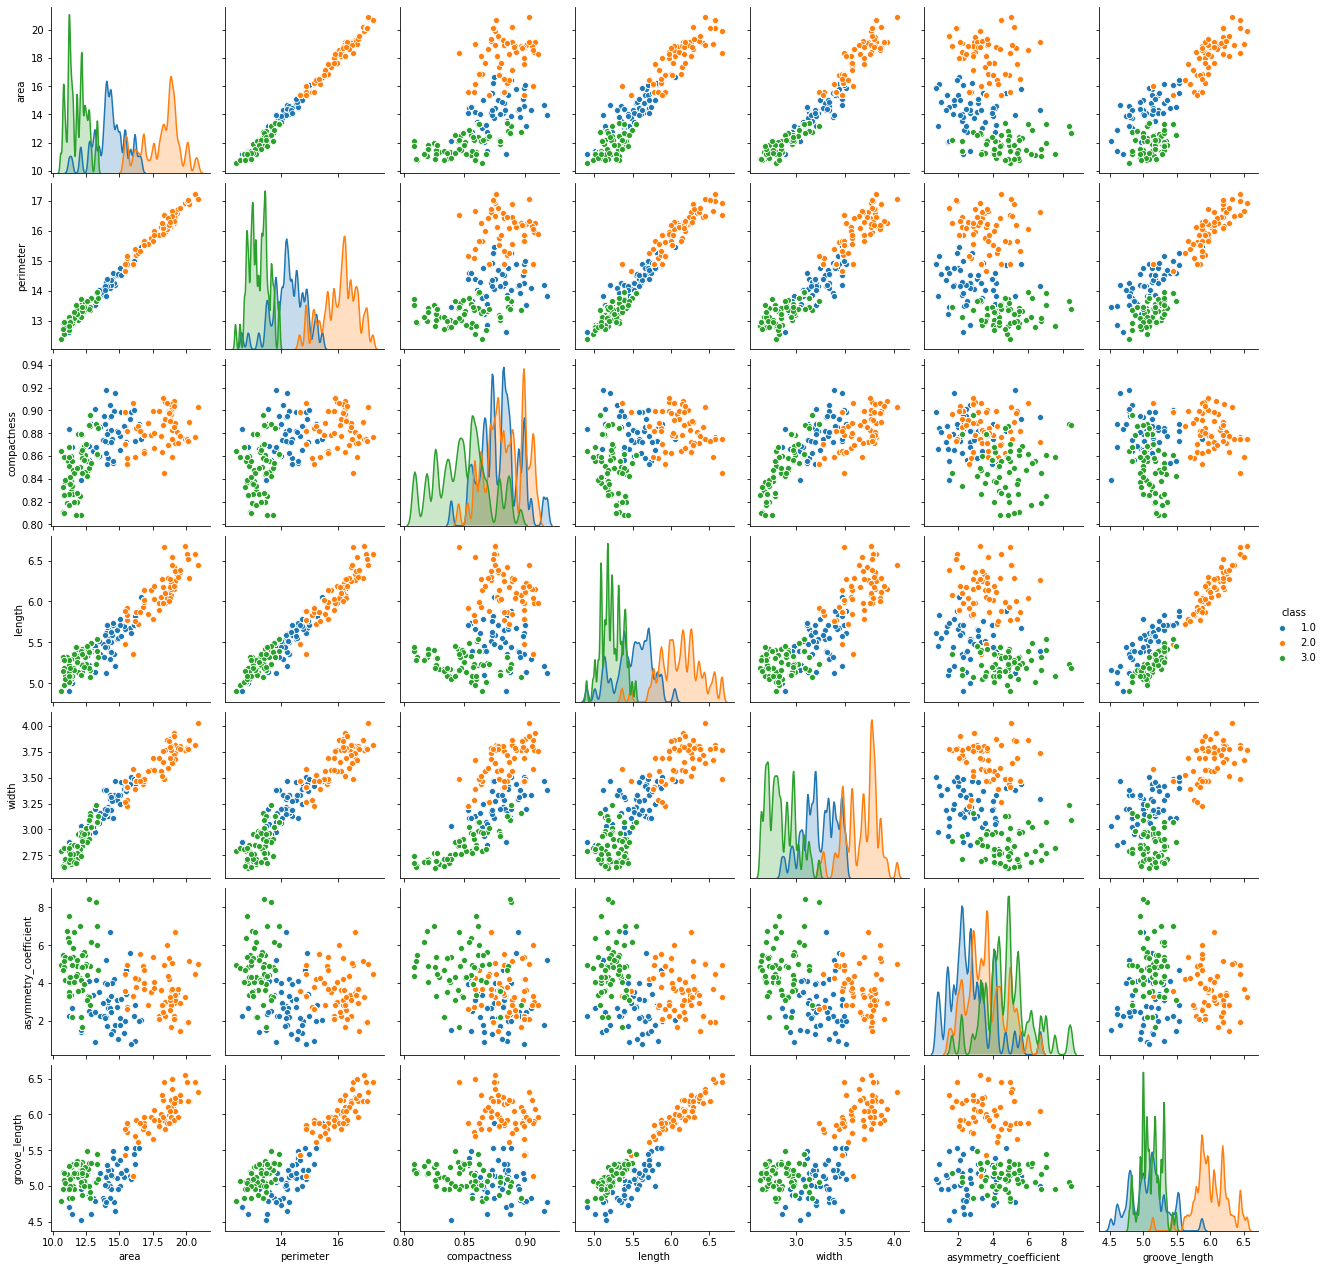

In [35]:
_=sns.pairplot(data=lg_sample,hue='class')

Now we can see the scatter matrix of the much larger bootstrapped sample. Notice the plots are the exact same as before. This is because there are no new points being plotted; the points are simply being plotted on top of each other in the same positions over and over. We see the evidence of the sampling in the distribution functions. In the original sample they are smooth with one clear peak. Now there is a great deal of noise to the distribution of each parameter. 

Next, we inspect and compare the distribution from the original data, to the bootstrap distribution to make sure the sample still falls within a tolerance limit of the original data.

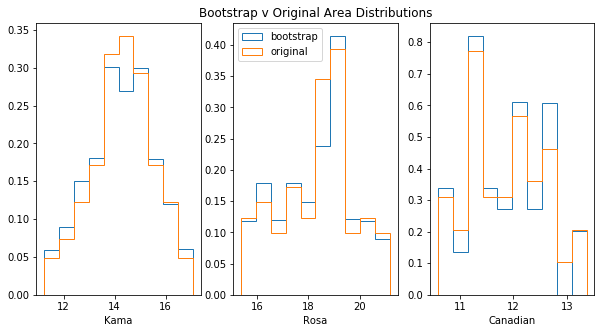

In [16]:
new1=lg_sample[lg_sample['class']==1]
new2=lg_sample[lg_sample['class']==2]
new3=lg_sample[lg_sample['class']==3]
_=plt.figure(figsize=(10,5))
_=plt.subplot(1,3,1)
_=plt.hist(new1.area,histtype='step',density=True)
_=plt.hist(seeds[seeds['class']==1].area,histtype='step',density=True)
_=plt.xlabel('Kama')
_=plt.subplot(1,3,2)
_=plt.title('Bootstrap v Original Area Distributions')
_=plt.hist(new2.area,histtype='step',density=True)
_=plt.hist(seeds[seeds['class']==2].area,histtype='step',density=True)
_=plt.xlabel('Rosa')
_=plt.legend(['bootstrap','original'],loc='upper left')
_=plt.subplot(1,3,3)
_=plt.hist(new3.area,histtype='step',density=True)
_=plt.hist(seeds[seeds['class']==3].area,histtype='step',density=True)
_=plt.xlabel('Canadian')

### Confidence Intervals

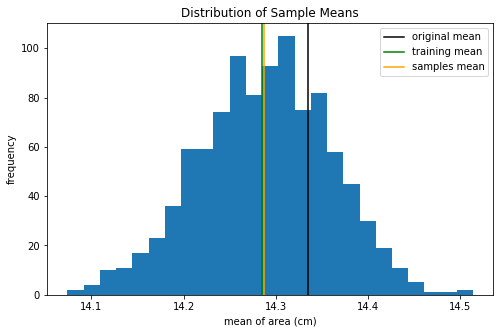

In [17]:
mean_list = [df[df['class']==1].area.mean() for df in sample_list]
_=plt.figure(figsize=(8,5))
_=plt.hist(mean_list,bins=25)
_=plt.axvline(seeds.iloc[:70,0].mean(),c='black')
_=plt.axvline(seeds_train[seeds_train['class']==1].area.mean(),c='green')
_=plt.axvline(np.mean(mean_list),c='orange')
_=plt.title('Distribution of Sample Means')
_=plt.xlabel('mean of area (cm)')
_=plt.ylabel('frequency')
_=plt.legend(['original mean','training mean','samples mean'])

The distribution of sample area means approaches a normal shape, as predicted by the Central Limit Theorem. The training set data's mean for Class 1 is larger than the full set, but the sample's mean is closer to the original data's mean than the training set's. This is a good sign that bootstrapping will help produce results closer to a larger population's true measures. 

In [18]:
#We can find the z-score using norm.ppf():
z = round(norm.ppf(.025),3)
z

-1.96

In [19]:
#Now we determine the confidence intermal:
lower = round(np.mean(mean_list) + z*np.std(mean_list,ddof=1),2)
upper = round(np.mean(mean_list) - z*np.std(mean_list,ddof=1),2)
print('The z-score calculation yields a 95% confidence interval range between ' + str(lower) + 'cm and ' + str(upper)+'cm')

The z-score calculation yields a 95% confidence interval range between 14.15cm and 14.43cm


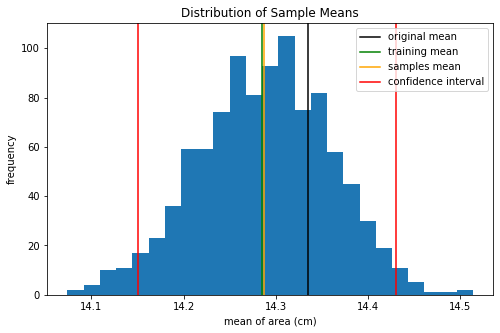

In [20]:
#Now let's revisit the above histogram with the confidence interval superimposed:
_=plt.figure(figsize=(8,5))
_=plt.hist(mean_list,bins=25)
_=plt.axvline(seeds.iloc[:70,0].mean(),c='black')
_=plt.axvline(seeds_train[seeds_train['class']==1].area.mean(),c='green')
_=plt.axvline(np.mean(mean_list),c='orange')
_=plt.axvline(upper,c='red')
_=plt.axvline(lower,c='red')
_=plt.title('Distribution of Sample Means')
_=plt.xlabel('mean of area (cm)')
_=plt.ylabel('frequency')
_=plt.legend(['original mean','training mean','samples mean','confidence interval'])

Both the original and sample means lie within the 95% confidence interval. What about the rest of the features?

perimeter


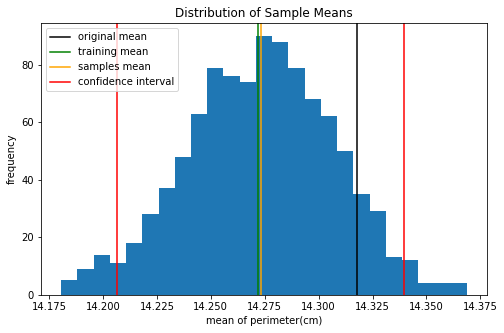

compactness


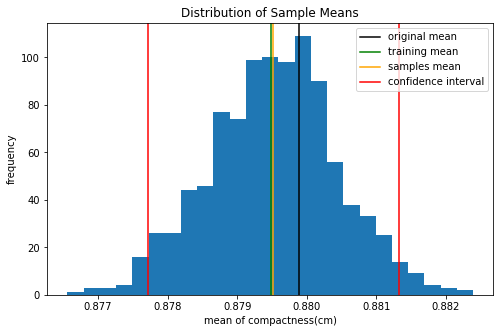

length


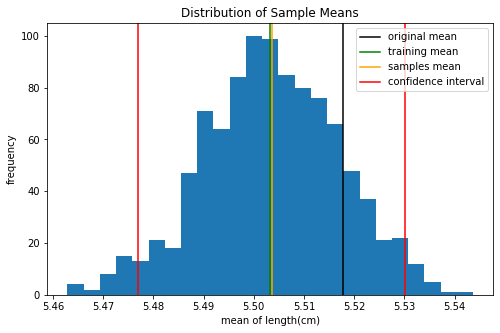

width


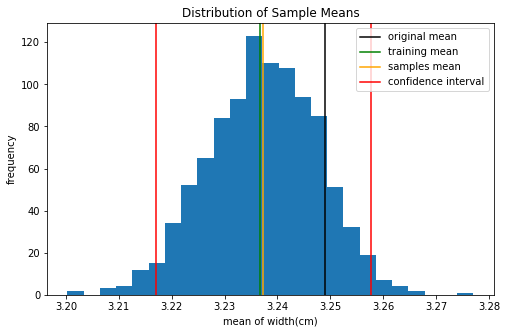

asymmetry_coefficient


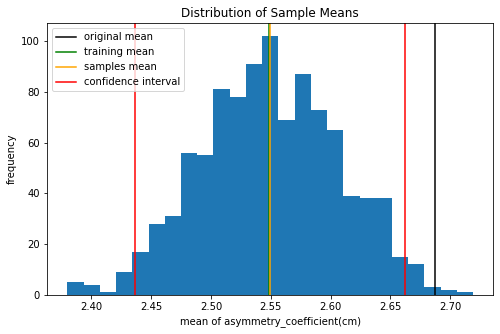

groove_length


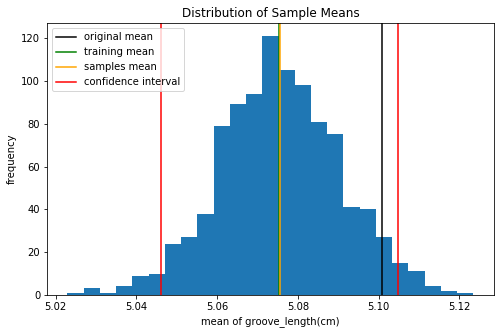

In [21]:
for col in seeds.columns:
    if col == 'class':
        break
    if col != 'area':
        print(col)
        z = round(norm.ppf(.025),3)
        means = [df[df['class']==1].loc[:,col].mean() for df in sample_list]
        lower = np.mean(means) + z*np.std(means,ddof=1)
        upper = np.mean(means) - z*np.std(means,ddof=1)
        _=plt.figure(figsize=(8,5))
        _=plt.hist(means,bins=25)
        _=plt.axvline(seeds.loc[:70,col].mean(),c='black')
        _=plt.axvline(seeds_train[seeds_train['class']==1].loc[:,col].mean(),c='green')
        _=plt.axvline(np.mean(means),c='orange')
        _=plt.axvline(upper,c='red')
        _=plt.axvline(lower,c='red')
        _=plt.title('Distribution of Sample Means')
        _=plt.xlabel('mean of '+str(col)+ '(cm)')
        _=plt.ylabel('frequency')
        _=plt.legend(['original mean','training mean','samples mean','confidence interval'])
        plt.show()

### Synthetic Data

In this section we attempt to increase the size of the dataset by creating new datapoints with attributes that all lie well within acceptable ranges for each particular class and attribute. The new points will not be repeated copies of previous points, but new points created from taking random samples of the feature distributions. Only the rows with points that all lie within the expected range for every feature are kept. 

An abundance of points is created, most of which have values that may be fine for one parameter, but lie way outside the acceptable range for another. To trim these and keep only points with all acceptable values, best fit lines are taken on key attributes. A range is taken on either side of the regression line, and only those points that fall within this range (i.e. close to the line) are kept. Doing this procedure for several nicely fitted variables trims down all of the unwanted points, leaving only points that are acceptable for analysis; they look very much like natural points and tend to fall close to the mean for each feature. I have affectionately named this the Bonsai Method of obtaining new data points.

Finally, we compare the new point distributions and scatter plots with those of the original. 

#### Class 1: Kama

In [22]:
#First we need to split up the data classes so their distributions don't get mixed, creating even more unacceptable points:
idx_1 = np.arange(70)
idx_2 = np.arange(70,140)
idx_3 = np.arange(140,210)
bs_idx_1 = np.random.choice(idx_1,len(idx_1))
bs_idx_2 = np.random.choice(idx_2,len(idx_2))
bs_idx_3 = np.random.choice(idx_3,len(idx_3))
seeds_1 = seeds_train[seeds_train['class']==1]
seeds_2 = seeds_train[seeds_train['class']==2]
seeds_3 = seeds_train[seeds_train['class']==3]

In [23]:
#We'll start by defining a function that samples the seeds distributions, then move to sampling each column.
def seedSampler(data):
    return(data.sample(n=10000,replace = True))

df=pd.DataFrame()
for name in seeds.columns:
    df_temp=pd.DataFrame()
    df_temp[str(name)] = seedSampler(seeds_1[str(name)])
    df_temp.reset_index(drop=True,inplace=True)
    df[str(name)]=df_temp[str(name)]
df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,11.23,15.25,0.8923,5.715,3.221,2.129,4.914,1.0
1,12.74,14.37,0.8820,5.674,3.333,3.373,5.528,1.0
2,14.29,14.94,0.8710,5.656,3.150,2.129,4.825,1.0
3,12.78,14.54,0.8823,5.715,3.258,2.704,5.000,1.0
4,13.45,14.77,0.8686,5.541,3.396,1.502,4.872,1.0
...,...,...,...,...,...,...,...,...
9995,14.46,14.37,0.8724,5.479,3.245,2.461,4.607,1.0
9996,15.26,15.38,0.8880,5.702,3.158,1.767,5.396,1.0
9997,14.16,14.21,0.8604,5.826,3.465,1.560,4.783,1.0
9998,16.44,15.38,0.8604,5.545,3.113,2.352,5.001,1.0


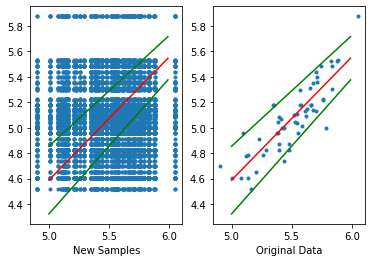

In [24]:
#Let's compare the scatter plot of all the new class 1 "seeds" with that of the original. We see that most of the
#new data points lie outside of the locus of the true data. To trim these, a best fit line is shown, and ranges on either
#side. 
m,b = np.polyfit(seeds_1.length,seeds_1.groove_length,1)
_=plt.figure()
_=plt.subplot(1,2,1)
_=plt.plot(df.length,df.groove_length,marker='.',linestyle='none')
_=plt.plot(np.arange(5,6,.01),m*np.arange(5,6,.01)+b,color='r')
_=plt.plot(np.arange(5,6,.01),.9*m*np.arange(5,6,.01)+b+.75,color='g')
_=plt.plot(np.arange(5,6,.01),1.1*m*np.arange(5,6,.01)+b-.75,color='g')
_=plt.xlabel('New Samples')
_=plt.subplot(1,2,2)
_=plt.plot(seeds_1.length,seeds_1.groove_length,marker='.',linestyle='none')
_=plt.plot(np.arange(5,6,.01),.9*m*np.arange(5,6,.01)+b+.75,color='g')
_=plt.plot(np.arange(5,6,.01),1.1*m*np.arange(5,6,.01)+b-.75,color='g')
_=plt.plot(np.arange(5,6,.01),m*np.arange(5,6,.01)+b,color='r')
_=plt.xlabel('Original Data')

In [25]:
#We apply the first round of trimming, keeping only the points that lie close to the regression line:
DF = pd.DataFrame(columns=seeds.columns)
#upper = .9*m*np.arange(5,6,.01)+b+.75
#lower = 1.1*m*np.arange(5,6,.01)+b-.75
for i in range(len(df)):
    if df.iloc[i,6] < .9*m*df.iloc[i,3]+b+.75 and df.iloc[i,6] > m*df.iloc[i,3]+b:
        DF = DF.append(df.iloc[i],ignore_index=True)
    if df.iloc[i,6] > 1.1*m*df.iloc[i,3]+b-.75 and df.iloc[i,6] < m*df.iloc[i,3]+b:
        DF = DF.append(df.iloc[i],ignore_index=True)

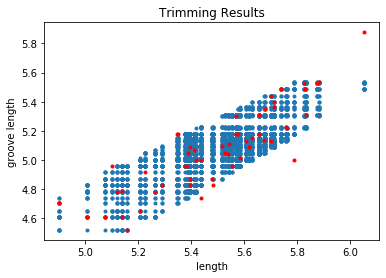

In [26]:
_=plt.plot(DF.length,DF.groove_length,marker='.',linestyle='none')
_=plt.plot(seeds_1.length,seeds_1.groove_length,marker='.',linestyle='none',color='r')
_=plt.xlabel('length')
_=plt.ylabel('groove length')
_=plt.title('Trimming Results')

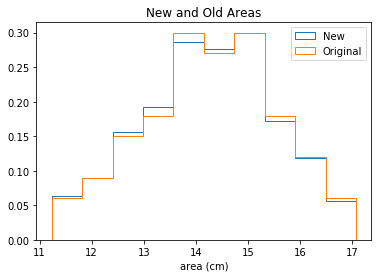

In [27]:
#Now we can check to see if the distributio of new points matches the original sample distribution:
_ = plt.hist(DF.area,histtype='step',density = True)
_ = plt.hist(seeds_1.area,histtype='step',density=True)
_ = plt.xlabel('area (cm)')
_ = plt.title('New and Old Areas')
_ = plt.legend(['New','Original'])

In [28]:
#Automating the trimming will speed up the process:
def dfTrimmer1D(df,to_fit,xcol,ycol,names,rng=.1):
    m,b=np.polyfit(to_fit.iloc[:,xcol],to_fit.iloc[:,ycol],1)
    X = np.arange(to_fit.iloc[:,xcol].min(),to_fit.iloc[:,xcol].max(),.05)
    _=plt.plot(to_fit.iloc[:,xcol],to_fit.iloc[:,ycol],marker='.',linestyle='none')
    _=plt.plot(X,m*X+b)
    _=plt.plot(X,m*X+b+rng,color = 'g')
    _=plt.plot(X,m*X+b-rng,color = 'g')
    plt.show()
    temp = pd.DataFrame(columns=names)
    for i in range(len(df)):
        if df.iloc[i,ycol] < m*df.iloc[i,xcol]+b+rng and df.iloc[i,ycol] > m*df.iloc[i,xcol]+b:
            temp = temp.append(df.iloc[i],ignore_index=True)
        if df.iloc[i,ycol] > m*df.iloc[i,xcol]+b-rng and df.iloc[i,ycol] < m*df.iloc[i,xcol]+b:
            temp = temp.append(df.iloc[i],ignore_index=True)

    return(temp)

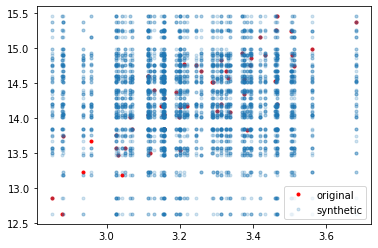

In [29]:
#Let's look at another nicely correlated pair of attributes, width and perimeter. Making another function will speed this 
#process for the rest of the classes as well:

def compareScatter(orig_x,orig_y,df_x,df_y):
    _ = plt.plot(orig_x,orig_y,marker='.',linestyle='none', color='r')
    _ = plt.plot(df_x, df_y,marker = '.',linestyle='none',alpha=.2)
    _ = plt.legend(['original','synthetic'])

compareScatter(seeds_1.width,seeds_1.perimeter,DF.width,DF.perimeter)

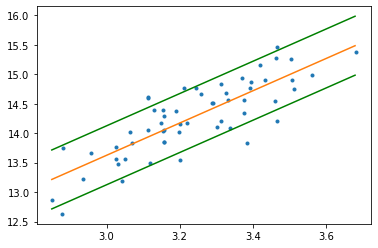

In [30]:
#Fit the data to find the acceptable range for trimming:
m,b = np.polyfit(seeds_1.width,seeds_1.perimeter,1)
X = np.arange(seeds_1.width.min(), seeds_1.width.max(),.01)
_ = plt.plot(seeds_1.width,seeds_1.perimeter,marker='.',linestyle='none')
_ = plt.plot(X,m*X+b)
_ = plt.plot(X,m*X+b+.5,color='g')
_ = plt.plot(X,m*X+b-.5,color='g')

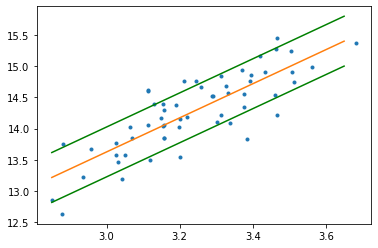

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,14.80,14.39,0.8796,5.395,3.288,2.352,4.956,1.0
1,14.37,14.77,0.8564,5.386,3.312,1.481,5.088,1.0
2,15.49,14.94,0.8879,5.395,3.371,2.699,5.091,1.0
3,15.69,14.21,0.8911,5.678,3.070,4.711,5.351,1.0
4,14.11,14.05,0.8923,5.439,3.129,2.587,5.091,1.0
...,...,...,...,...,...,...,...,...
1721,12.72,14.18,0.8923,5.630,3.155,2.802,5.136,1.0
1722,17.08,14.76,0.8734,5.826,3.333,2.700,5.307,1.0
1723,15.11,14.54,0.8658,5.554,3.464,2.124,4.956,1.0
1724,14.34,14.67,0.9034,5.395,3.377,2.217,5.001,1.0


In [31]:
#We trim the points outside of the acceptable range:
DF2 = dfTrimmer1D(DF,seeds_1,4,1,seeds_1.columns,.4)
DF2

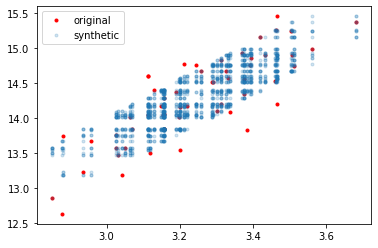

In [32]:
#Inspect the results of the second trimming:
compareScatter(seeds_1.width,seeds_1.perimeter,DF2.width,DF2.perimeter)

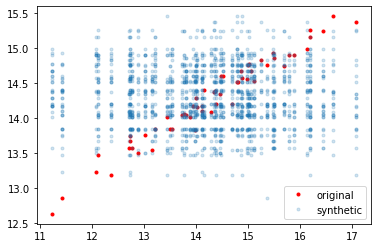

In [33]:
#Now we continue the trimming process by choosing another highly correlated pair of variables. This time we will use
#area and perimeter, because they show highly linear relationships that do not deviate far form the fit line. Consequently, our
#range of acceptance will be very small:
compareScatter(seeds_1.area,seeds_1.perimeter,DF2.area,DF2.perimeter)

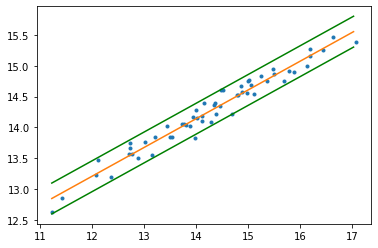

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,14.80,14.39,0.8796,5.395,3.288,2.352,4.956,1.0
1,15.49,14.94,0.8879,5.395,3.371,2.699,5.091,1.0
2,14.11,14.05,0.8923,5.439,3.129,2.587,5.091,1.0
3,14.88,14.37,0.8880,5.579,3.201,2.700,5.220,1.0
4,15.05,14.56,0.9034,5.658,3.393,3.373,5.176,1.0
...,...,...,...,...,...,...,...,...
425,14.16,14.18,0.8986,5.678,3.245,5.234,5.132,1.0
426,13.89,14.10,0.8794,5.763,3.113,4.102,5.175,1.0
427,14.11,14.05,0.8680,5.348,3.156,1.481,5.001,1.0
428,14.49,14.52,0.8871,5.412,3.371,2.823,5.180,1.0


In [34]:
DF3=pd.DataFrame()
DF3 = dfTrimmer1D(DF2,seeds_1,0,1,seeds_1.columns,.25)
DF3

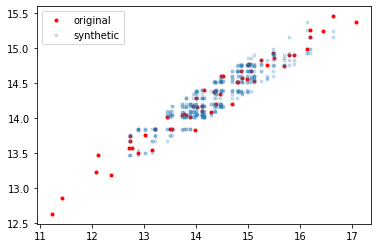

In [35]:
compareScatter(seeds_1.area,seeds_1.perimeter,DF3.area,DF3.perimeter)

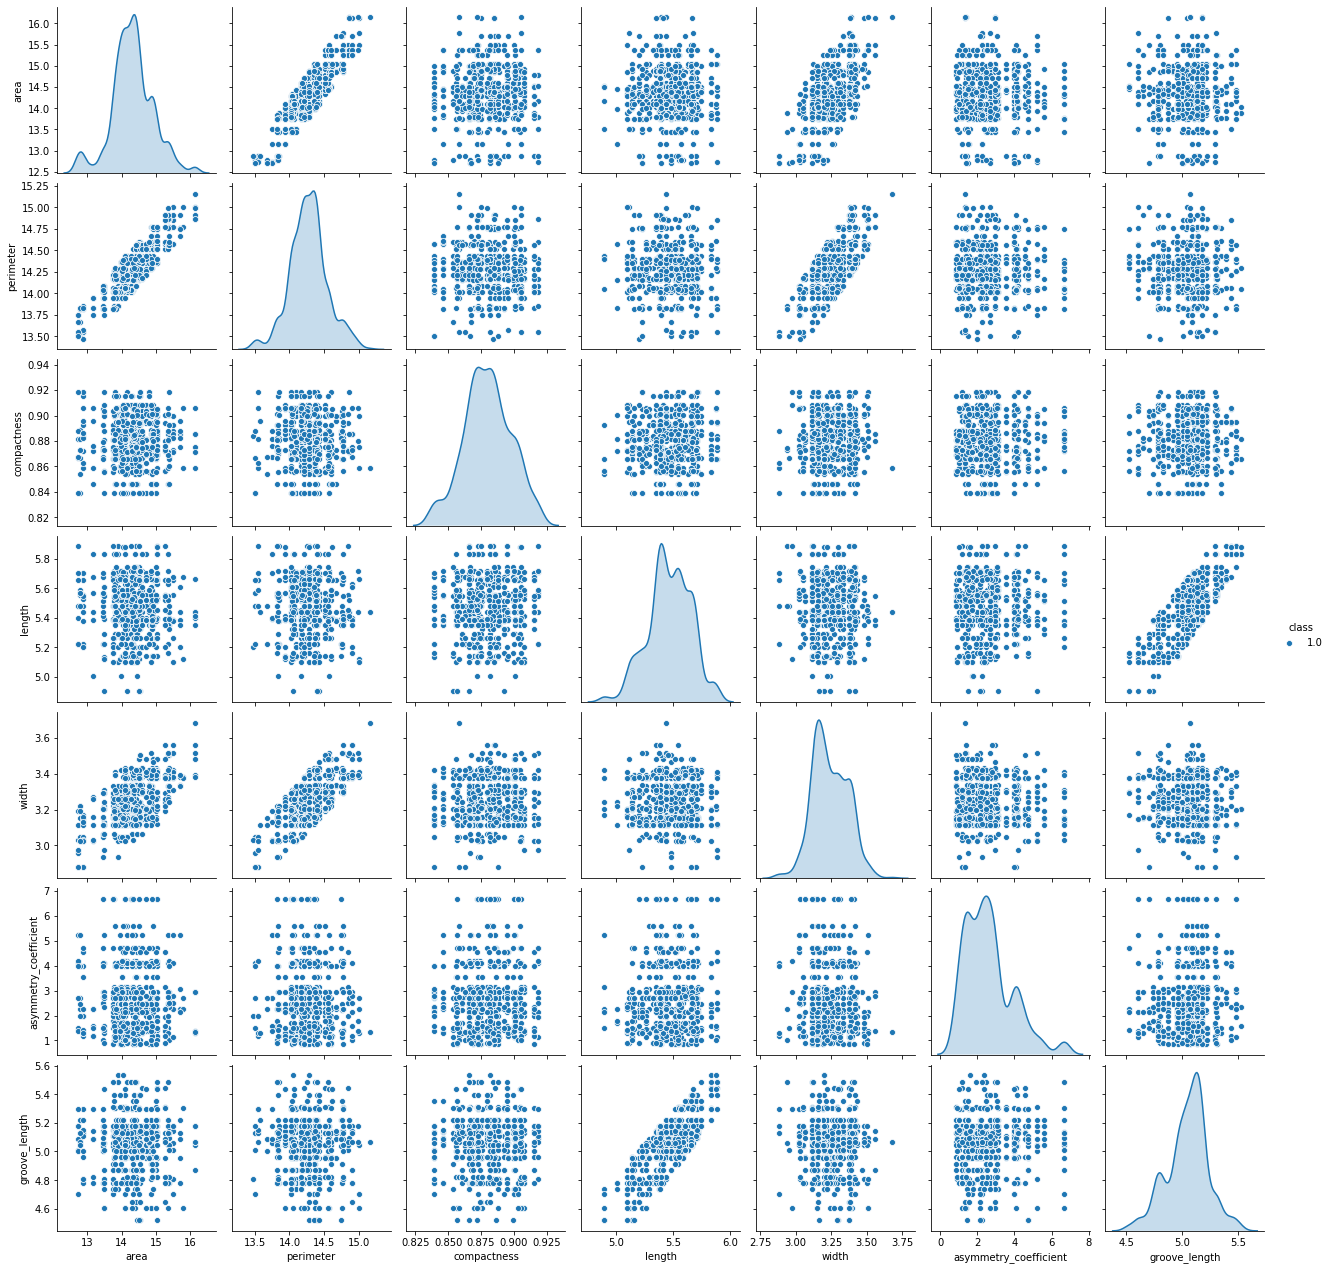

In [54]:
#Let's look at the Kama scatter matrix to see the effects of the trimming:
_=sns.pairplot(data=DF3,hue='class')

There are still many points that lie outside of the acceptable ranges, but the overall shape is beginning to conform to the picture of natural measurments gathered. We continue to choose highly correlated variables and trim further until every pair lies within an acceptable range.

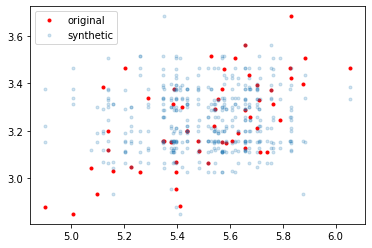

In [36]:
compareScatter(seeds_1.length,seeds_1.width,DF3.length,DF3.width)

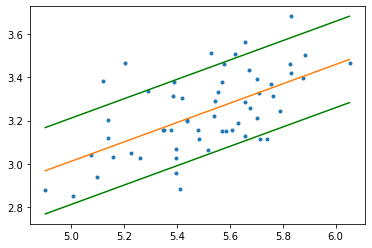

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,14.80,14.39,0.8796,5.395,3.288,2.352,4.956,1.0
1,15.49,14.94,0.8879,5.395,3.371,2.699,5.091,1.0
2,14.11,14.05,0.8923,5.439,3.129,2.587,5.091,1.0
3,14.88,14.37,0.8880,5.579,3.201,2.700,5.220,1.0
4,15.05,14.56,0.9034,5.658,3.393,3.373,5.176,1.0
...,...,...,...,...,...,...,...,...
342,13.74,14.09,0.8710,5.395,3.065,1.767,4.825,1.0
343,15.01,14.86,0.8820,5.701,3.312,1.599,5.220,1.0
344,14.16,14.18,0.8986,5.678,3.245,5.234,5.132,1.0
345,14.11,14.05,0.8680,5.348,3.156,1.481,5.001,1.0


In [37]:
DF4 = dfTrimmer1D(DF3,seeds_1,3,4,seeds_1.columns,.20)
DF4

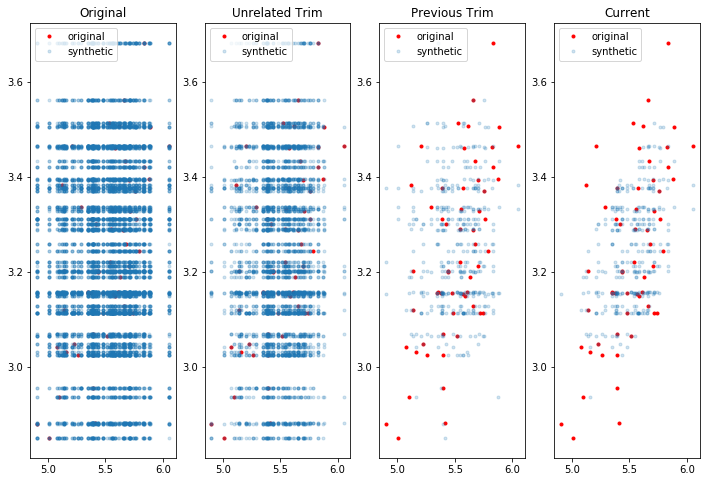

In [38]:
#It's interesting to plot the progress of unrelated trims, showing how each trim reduces the possibilities in other categories
#as well, leaving only the data points that best conform to the overall fit for each feature pair:
_=plt.figure(figsize=(12,8))
_=plt.subplot(1,4,1)
_=plt.title('Original')
compareScatter(seeds_1.length,seeds_1.width,df.length,df.width)
_=plt.subplot(1,4,2)
_=plt.title('Unrelated Trim')
compareScatter(seeds_1.length,seeds_1.width,DF.length,DF.width)
_=plt.subplot(1,4,3)
_=plt.title('Previous Trim')
compareScatter(seeds_1.length,seeds_1.width,DF3.length,DF3.width)
_=plt.subplot(1,4,4)
_=plt.title('Current')
compareScatter(seeds_1.length,seeds_1.width,DF4.length,DF4.width)

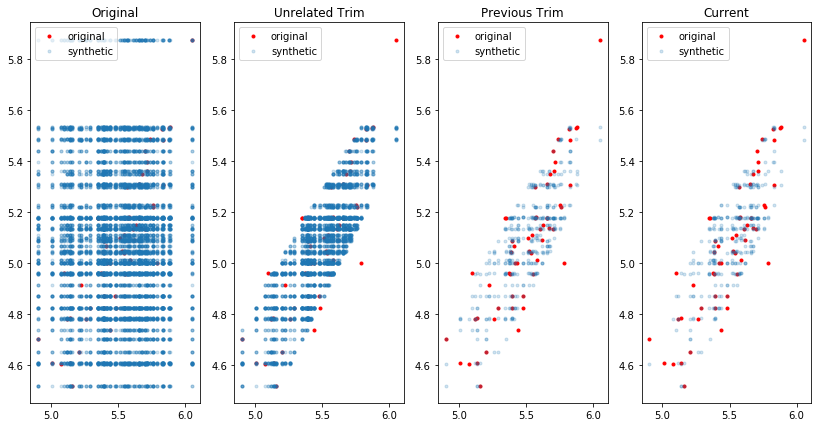

In [39]:
#We can see the same trend happening to our first comparison of length v groove length as well:
_=plt.figure(figsize=(14,7))
_=plt.subplot(1,4,1)
_=plt.title('Original')
compareScatter(seeds_1.length,seeds_1.groove_length,df.length,df.groove_length)
_=plt.subplot(1,4,2)
_=plt.title('Unrelated Trim')
compareScatter(seeds_1.length,seeds_1.groove_length,DF.length,DF.groove_length)
_=plt.subplot(1,4,3)
_=plt.title('Previous Trim')
compareScatter(seeds_1.length,seeds_1.groove_length,DF3.length,DF3.groove_length)
_=plt.subplot(1,4,4)
_=plt.title('Current')
compareScatter(seeds_1.length,seeds_1.groove_length,DF4.length,DF4.groove_length)

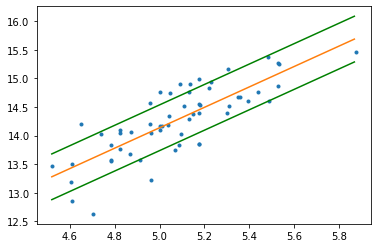

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,14.80,14.39,0.8796,5.395,3.288,2.352,4.956,1.0
1,14.11,14.05,0.8923,5.439,3.129,2.587,5.091,1.0
2,14.88,14.37,0.8880,5.579,3.201,2.700,5.220,1.0
3,15.05,14.56,0.9034,5.658,3.393,3.373,5.176,1.0
4,15.26,14.77,0.8676,5.609,3.421,3.112,5.307,1.0
...,...,...,...,...,...,...,...,...
233,13.74,14.09,0.8710,5.395,3.065,1.767,4.825,1.0
234,15.01,14.86,0.8820,5.701,3.312,1.599,5.220,1.0
235,14.16,14.18,0.8986,5.678,3.245,5.234,5.132,1.0
236,14.11,14.05,0.8680,5.348,3.156,1.481,5.001,1.0


In [40]:
DF5=pd.DataFrame()
DF5 = dfTrimmer1D(DF4,seeds_1,6,1,seeds_1.columns,.4)
DF5

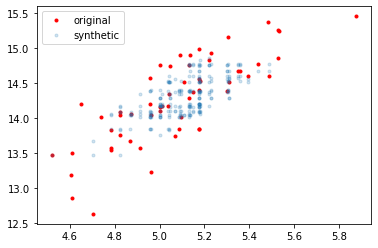

In [41]:
compareScatter(seeds_1.groove_length,seeds_1.perimeter,DF5.groove_length,DF5.perimeter)

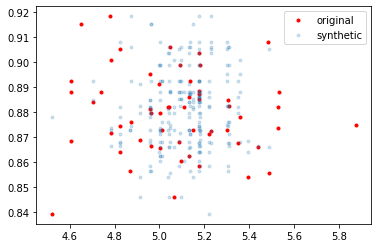

In [42]:
#Now let's look at the effect of these trims on the less highly correlated variables. 
compareScatter(seeds_1.groove_length,seeds_1.compactness,DF5.groove_length,DF5.compactness)

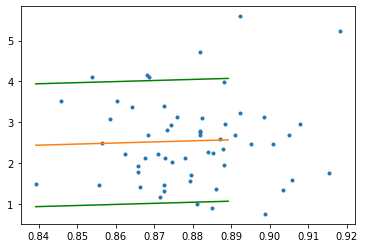

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,14.80,14.39,0.8796,5.395,3.288,2.352,4.956,1.0
1,14.11,14.05,0.8923,5.439,3.129,2.587,5.091,1.0
2,14.88,14.37,0.8880,5.579,3.201,2.700,5.220,1.0
3,15.05,14.56,0.9034,5.658,3.393,3.373,5.176,1.0
4,15.26,14.77,0.8676,5.609,3.421,3.112,5.307,1.0
...,...,...,...,...,...,...,...,...
194,14.01,14.21,0.8883,5.412,3.201,2.958,5.180,1.0
195,13.74,14.09,0.8710,5.395,3.065,1.767,4.825,1.0
196,15.01,14.86,0.8820,5.701,3.312,1.599,5.220,1.0
197,14.11,14.05,0.8680,5.348,3.156,1.481,5.001,1.0


In [44]:
DF_1 = dfTrimmer1D(DF5,seeds_1,2,5,seeds_1.columns,1.5)
DF_1

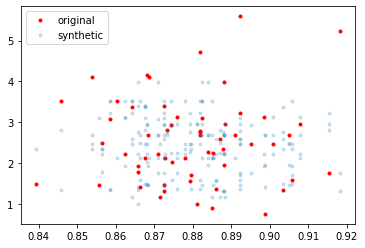

In [45]:
compareScatter(seeds_1.compactness,seeds_1.asymmetry_coefficient,DF_1.compactness,DF_1.asymmetry_coefficient)

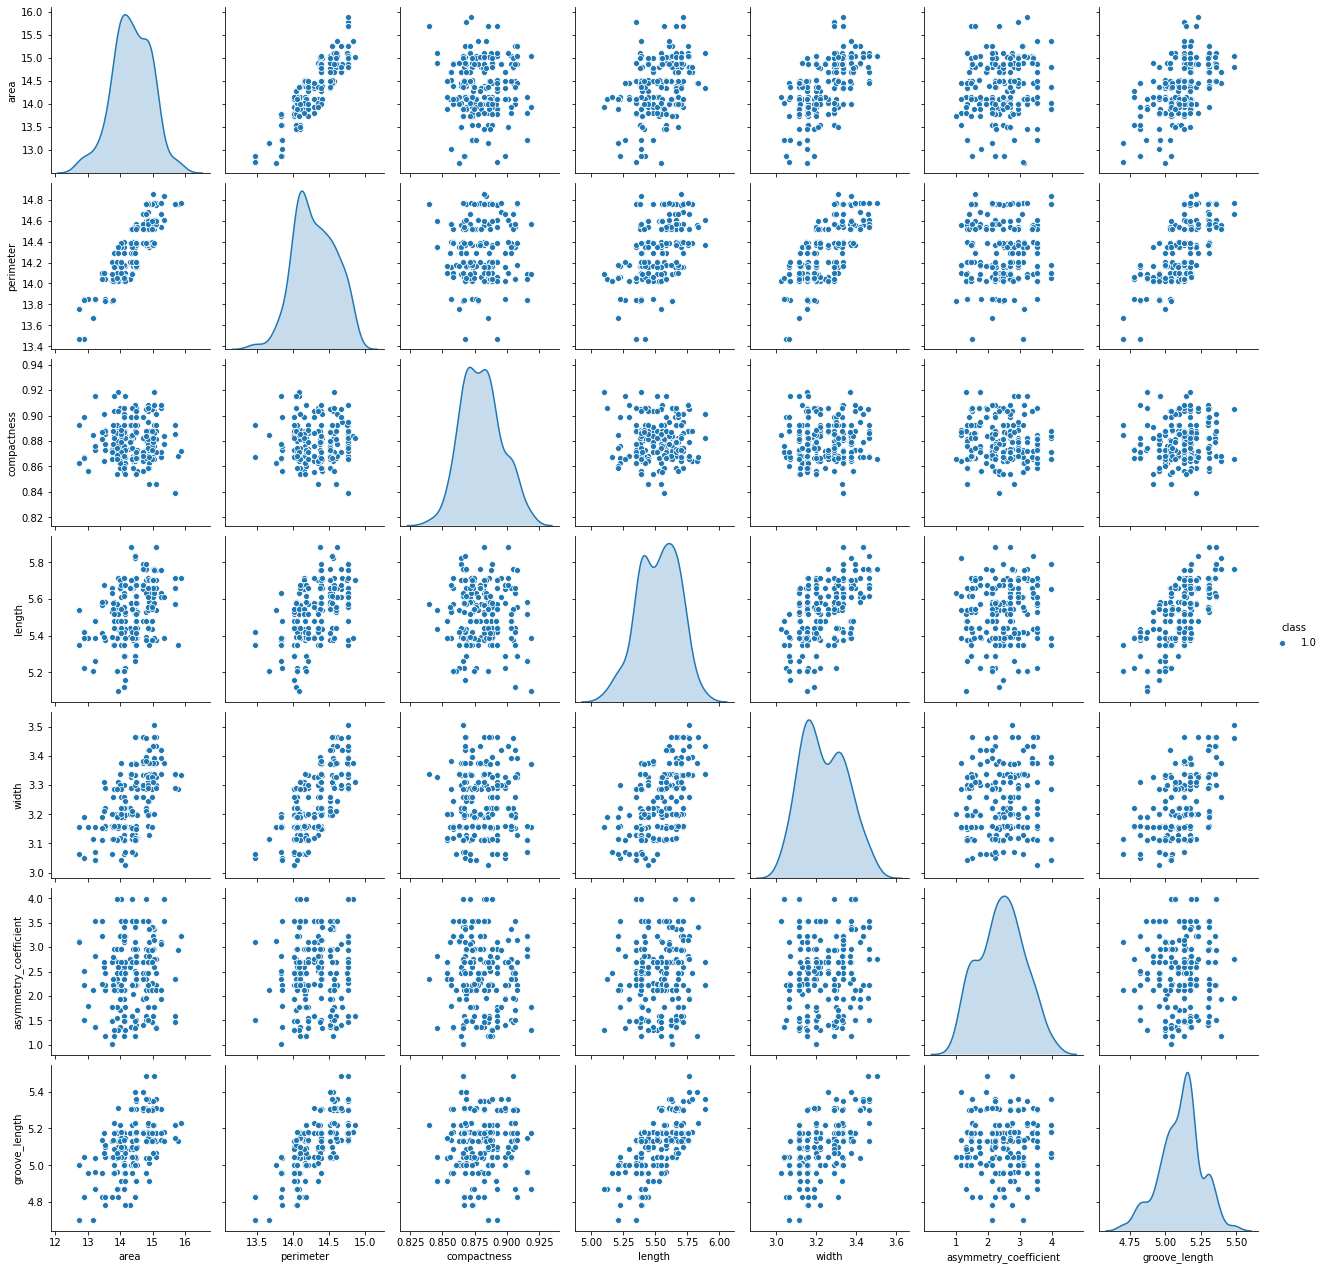

In [46]:
_=sns.pairplot(data=DF_1,hue='class')

Next we must apply the same process to the other two seed classes, Rosa and Canadian.

Having shown that this process can be successful in creating new points whose features lie within acceptable limits, application to Rosa and Canadian will be done in a future notebook. 

## Conclusions

Though the seeds dataset is small, it is rich with correlations between features. Clustering is seen in the scatterplots, with the most separation seen in the length vs. groove_length comparison. This can be used to make a rather accurate k-nearest neighbors algorithm.

Each class has different summary statistics for its features. Consequently, each feature is distributed differently for each class. These distributions are in general not normal, but some of them come close to fitting a normal curve.

The underwhelming size of the data can be addressed in three different ways, two of which have been developed here. The third is cross validation (CV), which will be performed in a later notebook. First, we can create as many larger bootstrap samples as we need, sampling the training set with replacement. These different samplings can give us a confidence interval for the population, a mean of means, etc., that does approach a normal distribution in the large limit, and describes the entire population of seeds more accurately. However, there are no new data points with which to train and gain new information.

Next we created a large range of sample points by sampling every distribtuion across the columns and making new points with these uncoordinated sample values. Due to the randomness, many of the points are unacceptable because one or more features has a value that lies well outside an acceptable range for that feature. In order to exclude the erroneous rows of new synthetic data, we find best fit lines for highly correlated pairs of features in the original set, and trim off the synthetic points that lie outside a range close to the best fit line. In this way, no outliers for any feature are introduced, and clustering around the mean tends to be left. We then append the original data to the synthetic, creating a larger dataset that contains all of the original points with their natural outliers, as well as the new data that tends to be clustered around the mean. The efficacy of this bonsai method must be tested, comparing an algorithm's performance on the expanded set versus the original data alone.